In [0]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Learning an Affine 2D Transformation

**Overview**
This exercise is about learning an 2D transformation transforming image coordinates  of a person walking in the atrium at ITU to an overview map (image) of the ground-floor of ITU. 
Assuming that an affine mapping is sufficient, the goal of this exercise is learn the coefficients of the affine mapping given training data and then subsequently map the tracking coordinates for the person in the video.


**Important**
The material covered in this exercise forms the basis for the mandatory assignment, but involves different data. We highly recommend that you read all of the material carefully before attempting to solve the exercise and that you complete this exercise before solving the assignment.


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#pen_paper">Task 1: Constructing the design matrix</a>
            </li>
            <li>
            <a href="#viz">Task 2: Visualize data</a>
            </li>
            <li>
            <a href="#affine2">Task 3: Implement the model</a>
            </li>
            <li>
            <a href="#load12">Task 4: Load data</a>
            </li>
            <li>
            <a href="#apply_affine">Task 5: Defining the affine transformation</a>
            </li>
            <li>
            <a href="#transform">Task 6: Affine transformation of points</a>
            </li>
            <li>
            <a href="#plot">Task 7: Plot results</a>
            </li>
        </ul>
    </div>
</article>

## Introduction
<div class="has-text-centered">
<figure class="image is-inline-block" id="names">

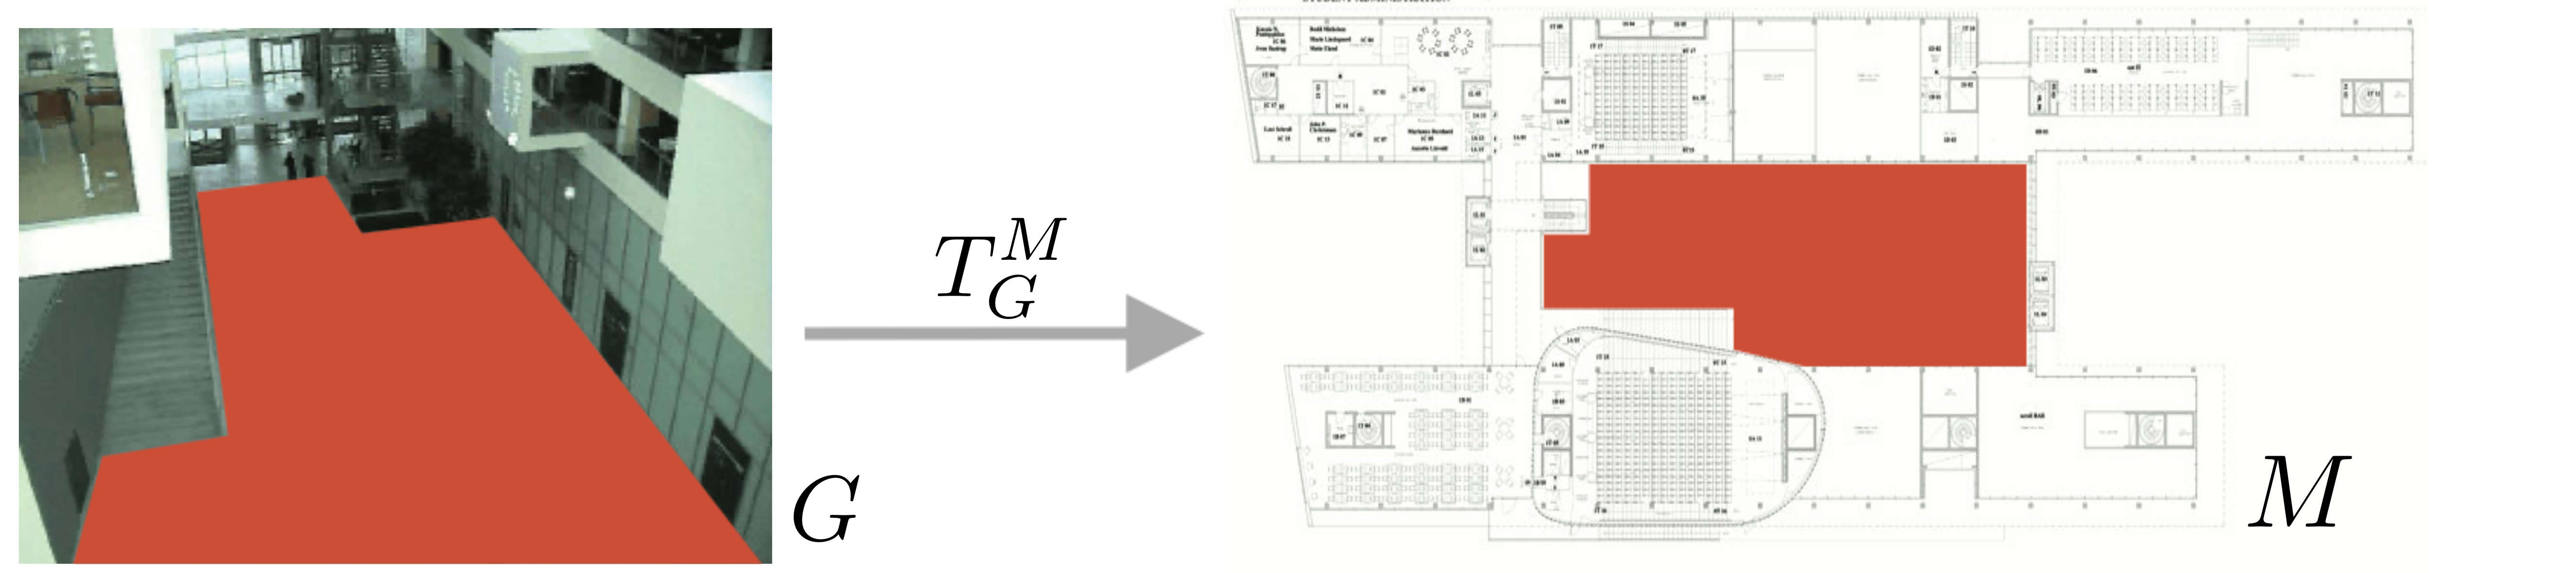

<figcaption class="figure-caption has-text-centered">Figure 1: Naming the planes and transformation</figcaption>
</figure>
</div>
[Figure 1](#names) shows the overview map to which the tracking data should be mapped, denote:
1. $I$: an image in the video `ITUStudent.mov`
 (for clarity $I = I_t$ where $t$ is time).
2. $G$: the ground-floor in $I$
3. $M$: overview map of the ground-floor plane in $I$ of ITU building (seen from above)
4. ${T}_G^M$: the affine transformation from the ground-floor $G$ to the overview map $M$. Note that the subscripts define where the transformation maps from and to.

Overall, your tasks are to:
1. Learn the coefficients of the affine transformation (the entries of the transformation matrix) ${T}_G^M$.
2. Apply the mapping ${T}_G^M$ to transform the tracking data from the ground-floor $G$ to the overview map $M$.
3. Display the location of the person on the ground-floor on the overview map. 

**Note:** Overall, completing these steps will potentially allow you to compute metric measurments such as distances, speed and acceleration of the tracked person.

<div class="has-text-centered">
<figure class="image is-inline-block" id="points">

<img src="data:image/png;base64,<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg width="100%" height="100%" viewBox="0 0 771 1309" version="1.1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:space="preserve" xmlns:serif="http://www.serif.com/" style="fill-rule:evenodd;clip-rule:evenodd;stroke-miterlimit:2;">
    <g transform="matrix(4.16667,0,0,4.16667,0,0)">
        <path d="M113.167,44.314C113.167,56.683 103.14,66.71 90.771,66.71C78.401,66.71 68.375,56.683 68.375,44.314C68.375,31.945 78.401,21.918 90.771,21.918C103.14,21.918 113.167,31.945 113.167,44.314Z" style="fill:rgb(147,149,152);fill-rule:nonzero;"/>
        <path d="M113.167,44.314C113.167,56.683 103.14,66.71 90.771,66.71C78.401,66.71 68.375,56.683 68.375,44.314C68.375,31.945 78.401,21.918 90.771,21.918C103.14,21.918 113.167,31.945 113.167,44.314Z" style="fill:none;stroke:rgb(35,31,32);stroke-width:1px;"/>
        <path d="M113.167,152.626C113.167,159.254 107.794,164.626 101.167,164.626L80.375,164.626C73.747,164.626 68.375,159.254 68.375,152.626L68.375,82.877C68.375,76.249 73.747,70.877 80.375,70.877L101.167,70.877C107.794,70.877 113.167,76.249 113.167,82.877L113.167,152.626Z" style="fill:rgb(147,149,152);fill-rule:nonzero;"/>
        <path d="M113.167,152.626C113.167,159.254 107.794,164.626 101.167,164.626L80.375,164.626C73.747,164.626 68.375,159.254 68.375,152.626L68.375,82.877C68.375,76.249 73.747,70.877 80.375,70.877L101.167,70.877C107.794,70.877 113.167,76.249 113.167,82.877L113.167,152.626Z" style="fill:none;stroke:rgb(35,31,32);stroke-width:1px;"/>
        <path d="M86.604,240.408C86.604,246.592 81.59,251.605 75.405,251.605C69.221,251.605 64.208,246.592 64.208,240.408L64.208,186.762C64.208,180.578 69.221,175.564 75.405,175.564C81.59,175.564 86.604,180.578 86.604,186.762L86.604,240.408Z" style="fill:rgb(147,149,152);fill-rule:nonzero;"/>
        <path d="M86.604,240.408C86.604,246.592 81.59,251.605 75.405,251.605C69.221,251.605 64.208,246.592 64.208,240.408L64.208,186.762C64.208,180.578 69.221,175.564 75.405,175.564C81.59,175.564 86.604,180.578 86.604,186.762L86.604,240.408Z" style="fill:none;stroke:rgb(35,31,32);stroke-width:1px;"/>
        <path d="M113.167,240.407C113.167,246.592 108.153,251.605 101.968,251.605C95.784,251.605 90.77,246.592 90.77,240.407L90.77,186.762C90.77,180.578 95.784,175.564 101.968,175.564C108.153,175.564 113.167,180.578 113.167,186.762L113.167,240.407Z" style="fill:rgb(147,149,152);fill-rule:nonzero;"/>
        <path d="M113.167,240.407C113.167,246.592 108.153,251.605 101.968,251.605C95.784,251.605 90.77,246.592 90.77,240.407L90.77,186.762C90.77,180.578 95.784,175.564 101.968,175.564C108.153,175.564 113.167,180.578 113.167,186.762L113.167,240.407Z" style="fill:none;stroke:rgb(35,31,32);stroke-width:1px;"/>
        <rect x="49.625" y="70.877" width="82.292" height="93.749" style="fill:none;stroke:rgb(237,28,36);stroke-width:1px;"/>
        <path d="M33.87,70.877L34.914,70.877L34.914,67.637C35.154,67.697 35.442,67.709 35.754,67.709C36.774,67.709 37.674,67.409 38.226,66.821C38.634,66.401 38.85,65.825 38.85,65.093C38.85,64.373 38.586,63.785 38.142,63.401C37.662,62.969 36.906,62.729 35.874,62.729C35.034,62.729 34.374,62.801 33.87,62.885L33.87,70.877ZM34.914,63.641C35.094,63.593 35.442,63.557 35.898,63.557C37.05,63.557 37.806,64.073 37.806,65.141C37.806,66.257 37.038,66.869 35.778,66.869C35.43,66.869 35.142,66.845 34.914,66.785L34.914,63.641Z" style="fill:rgb(35,31,32);fill-rule:nonzero;"/>
        <path d="M42.173,70.877L43.193,70.877L43.193,63.077L42.293,63.077L40.589,63.989L40.793,64.793L42.149,64.061L42.173,64.061L42.173,70.877Z" style="fill:rgb(35,31,32);fill-rule:nonzero;"/>
        <path d="M132.828,170.793L133.872,170.793L133.872,167.553C134.112,167.613 134.4,167.625 134.712,167.625C135.732,167.625 136.632,167.325 137.184,166.737C137.592,166.317 137.808,165.741 137.808,165.009C137.808,164.289 137.544,163.701 137.1,163.317C136.62,162.885 135.864,162.645 134.832,162.645C133.992,162.645 133.332,162.717 132.828,162.801L132.828,170.793ZM133.872,163.557C134.052,163.509 134.4,163.473 134.856,163.473C136.008,163.473 136.764,163.989 136.764,165.057C136.764,166.173 135.996,166.785 134.736,166.785C134.388,166.785 134.1,166.761 133.872,166.701L133.872,163.557Z" style="fill:rgb(35,31,32);fill-rule:nonzero;"/>
        <path d="M143.819,170.794L143.819,169.918L140.315,169.918L140.315,169.894L140.939,169.318C142.583,167.734 143.627,166.57 143.627,165.13C143.627,164.014 142.919,162.862 141.239,162.862C140.339,162.862 139.571,163.198 139.031,163.654L139.367,164.398C139.727,164.098 140.315,163.738 141.023,163.738C142.187,163.738 142.571,164.47 142.571,165.262C142.559,166.438 141.659,167.446 139.667,169.342L138.839,170.146L138.839,170.794L143.819,170.794Z" style="fill:rgb(35,31,32);fill-rule:nonzero;"/>
        <rect x="49.625" y="170.793" width="82.292" height="93.75" style="fill:none;stroke:rgb(46,48,146);stroke-width:1px;"/>
        <path d="M33.87,181.814L34.914,181.814L34.914,178.574C35.154,178.634 35.442,178.646 35.754,178.646C36.774,178.646 37.674,178.346 38.226,177.758C38.634,177.338 38.85,176.762 38.85,176.03C38.85,175.31 38.586,174.722 38.142,174.338C37.662,173.906 36.906,173.666 35.874,173.666C35.034,173.666 34.374,173.738 33.87,173.822L33.87,181.814ZM34.914,174.578C35.094,174.53 35.442,174.494 35.898,174.494C37.05,174.494 37.806,175.01 37.806,176.078C37.806,177.194 37.038,177.806 35.778,177.806C35.43,177.806 35.142,177.782 34.914,177.722L34.914,174.578Z" style="fill:rgb(35,31,32);fill-rule:nonzero;"/>
        <path d="M39.845,181.419C40.229,181.671 40.997,181.947 41.873,181.947C43.745,181.947 44.717,180.855 44.717,179.607C44.717,178.515 43.937,177.795 42.977,177.603L42.977,177.579C43.937,177.231 44.417,176.547 44.417,175.743C44.417,174.795 43.721,173.883 42.185,173.883C41.345,173.883 40.553,174.183 40.145,174.483L40.421,175.251C40.757,175.011 41.357,174.735 41.981,174.735C42.953,174.735 43.349,175.287 43.349,175.911C43.349,176.835 42.377,177.231 41.609,177.231L41.021,177.231L41.021,178.023L41.609,178.023C42.629,178.023 43.613,178.491 43.625,179.583C43.637,180.231 43.217,181.095 41.861,181.095C41.129,181.095 40.433,180.795 40.133,180.603L39.845,181.419Z" style="fill:rgb(35,31,32);fill-rule:nonzero;"/>
        <path d="M137.37,269.689L138.414,269.689L138.414,266.449C138.654,266.509 138.942,266.521 139.254,266.521C140.274,266.521 141.174,266.221 141.726,265.633C142.134,265.213 142.35,264.637 142.35,263.905C142.35,263.185 142.086,262.597 141.642,262.213C141.162,261.781 140.406,261.541 139.374,261.541C138.534,261.541 137.874,261.613 137.37,261.697L137.37,269.689ZM138.414,262.453C138.594,262.405 138.942,262.369 139.398,262.369C140.55,262.369 141.306,262.885 141.306,263.953C141.306,265.069 140.538,265.681 139.278,265.681C138.93,265.681 138.642,265.657 138.414,265.597L138.414,262.453Z" style="fill:rgb(35,31,32);fill-rule:nonzero;"/>
        <path d="M147.641,269.69L147.641,267.566L148.733,267.566L148.733,266.738L147.641,266.738L147.641,261.89L146.501,261.89L143.021,266.87L143.021,267.566L146.645,267.566L146.645,269.69L147.641,269.69ZM144.089,266.738L144.089,266.714L145.997,264.062C146.213,263.702 146.405,263.366 146.645,262.91L146.681,262.91C146.657,263.318 146.645,263.726 146.645,264.134L146.645,266.738L144.089,266.738Z" style="fill:rgb(35,31,32);fill-rule:nonzero;"/>
        <rect x="17.333" y="10.46" width="154.167" height="290.625" style="fill:none;stroke:rgb(0,166,80);stroke-width:1px;"/>
        <path d="M0.912,10.459L1.956,10.459L1.956,7.219C2.196,7.279 2.484,7.291 2.796,7.291C3.816,7.291 4.716,6.991 5.268,6.403C5.676,5.983 5.892,5.407 5.892,4.675C5.892,3.955 5.628,3.367 5.184,2.983C4.704,2.551 3.948,2.311 2.916,2.311C2.076,2.311 1.416,2.383 0.912,2.467L0.912,10.459ZM1.956,3.223C2.136,3.175 2.484,3.139 2.94,3.139C4.092,3.139 4.848,3.655 4.848,4.723C4.848,5.839 4.08,6.451 2.82,6.451C2.472,6.451 2.184,6.427 1.956,6.367L1.956,3.223Z" style="fill:rgb(35,31,32);fill-rule:nonzero;"/>
        <path d="M11.579,2.659L7.847,2.659L7.343,6.403C7.631,6.367 7.979,6.319 8.423,6.319C9.983,6.319 10.655,7.039 10.667,8.047C10.667,9.091 9.815,9.739 8.819,9.739C8.111,9.739 7.475,9.499 7.151,9.307L6.887,10.111C7.259,10.351 7.979,10.591 8.831,10.591C10.523,10.591 11.735,9.451 11.735,7.927C11.735,6.943 11.231,6.271 10.619,5.923C10.139,5.635 9.539,5.503 8.939,5.503C8.651,5.503 8.483,5.527 8.303,5.551L8.603,3.547L11.579,3.547L11.579,2.659Z" style="fill:rgb(35,31,32);fill-rule:nonzero;"/>
        <path d="M172.411,311L173.455,311L173.455,307.76C173.695,307.82 173.983,307.832 174.295,307.832C175.315,307.832 176.215,307.532 176.767,306.944C177.175,306.524 177.391,305.948 177.391,305.216C177.391,304.496 177.127,303.908 176.683,303.524C176.203,303.092 175.447,302.852 174.415,302.852C173.575,302.852 172.915,302.924 172.411,303.008L172.411,311ZM173.455,303.764C173.635,303.716 173.983,303.68 174.439,303.68C175.591,303.68 176.347,304.196 176.347,305.264C176.347,306.38 175.579,306.992 174.319,306.992C173.971,306.992 173.683,306.968 173.455,306.908L173.455,303.764Z" style="fill:rgb(35,31,32);fill-rule:nonzero;"/>
        <path d="M182.874,303.081C182.682,303.081 182.418,303.093 182.106,303.141C181.122,303.261 180.258,303.657 179.61,304.293C178.842,305.061 178.29,306.273 178.29,307.809C178.29,309.837 179.382,311.133 181.05,311.133C182.67,311.133 183.642,309.813 183.642,308.385C183.642,306.861 182.67,305.865 181.29,305.865C180.426,305.865 179.778,306.273 179.406,306.765L179.37,306.765C179.55,305.481 180.426,304.269 182.082,303.993C182.382,303.945 182.658,303.933 182.874,303.945L182.874,303.081ZM181.05,310.317C179.946,310.317 179.358,309.369 179.334,308.085C179.334,307.893 179.382,307.737 179.454,307.617C179.742,307.053 180.33,306.657 180.966,306.657C181.938,306.657 182.574,307.329 182.574,308.445C182.574,309.561 181.962,310.317 181.05,310.317Z" style="fill:rgb(35,31,32);fill-rule:nonzero;"/>
    </g>
</svg>
" class="figure-img img-fluid rounded" style="width:20%" />

<figcaption class="figure-caption has-text-centered">Figure 2: The three sub-regions of the person being tracked.</figcaption>
</figure>
</div>
The data is provided in the `data/`
 folder. The 3 pairs of corresponding points are the training data for learning the affine mapping and the tracking data is the test data. The tracking data is obtained from `trackingdata.dat`
 where each row $r_i$ contains tracking coordinates for frame $i$ in the video `ITUStudent.mov`
.
As shown in [Figure 2](#points), each rectangle is defined by coordinates pairs $(x_1, y_1)$ and $(x_2, y_2)$ corresponding to the top left and 
bottom right hand corners of the rectangle. The rectangles for specific bodyparts are stored  in a dictionary `data`
 that has keys "body", "legs", and "all". 
To access the arrays of the corresponding body parts.
## Background on 2D Affine mappings
A 2D affine mapping in homogeneous coordinates $T$ is given by

$$ T = 
\begin{bmatrix}
    w_1 & w_2 & w_3 \\
    w_4 & w_5 & w_6 \\
    0 & 0 & 1
\end{bmatrix},
$$
where $T$  transforms points between the planes by $p^{\prime} = T p$. Where $p$ and $p^{\prime}$ are 2D  homogeneous coordinates.
Define $\mathbf{w}$ as the vector of coefficients of $T$. 

$$\mathbf{w} = \begin{bmatrix} w_1 \\ w_2 \\ w_3\\ w_4 \\ w_5 \\ w_6 \end{bmatrix}.$$
The goal is to linearly estimate $\mathbf{w}$ given corresponding point pairs from $G$ and $M$.

---
**Task 1 (medium): Constructing the design matrix♾️**
This task is divided into 
- (1) a step showing the linear relationship between a single input-output pair yielding the first rows of the design matrix and 
- (2) a step extending this to multiple input-output point pairs.

1. Given an input $p=\begin{bmatrix} x \\ y \\1\end{bmatrix}$ and output $p'=\begin{bmatrix} x' \\ y' \\1\end{bmatrix}$, explain how the knowns and unknowns of the affine mapping $T$ can be represented in the form $A_1\mathbf{w}=b_1$ 

$$A_1=\begin{bmatrix}
        x & y & 1 & 0 & 0 & 0 \\
        0 & 0 & 0 & x & y & 1 \\
        \end{bmatrix},\quad
        \mathbf{w}=
        \begin{bmatrix}
        w_1 \\
        w_2 \\
        w_3 \\
        w_4 \\
        w_5 \\
        w_6
    \end{bmatrix}
    ,\quad
    b_1=\begin{bmatrix}
        x^{\prime} \\
        y^{\prime} \\
        \end{bmatrix}.
    $$
where the knowns are located in $A_1$ and the unknowns in $\mathbf{w}$. 
This means that a pair of corresponding points yield two equations in the design matrix $A$ and $\mathbf{w}$ contains the model parameters. 

2. Argue why at least $3$ pairs of corresponding points are required to solve for the unknowns $\mathbf{w}$.

3. Show that the unknowns $\mathbf{w}$ can be by found through  $\mathbf{w} = A^{-1}b$,  where $A$ is the design matrix, containing only input values, and $b$ is the vector containing only output values. 

$$A = \begin{bmatrix}
        x_1 & y_1 & 1 & 0 & 0 & 0 \\
        0 & 0 & 0 & x_1 & y_1 & 1 \\
        x_2 & y_2 & 1 & 0 & 0 & 0 \\
        0 & 0 & 0 & x_2 & y_2 & 1 \\
        x_3 & y_3 & 1 & 0 & 0 & 0 \\
        0 & 0 & 0 & x_3 & y_3 & 1
    \end{bmatrix},
     b = \begin{bmatrix}
        x_1^{\prime} \\
        y_1^{\prime} \\
        x_2^{\prime} \\
        y_2^{\prime} \\
        x_3^{\prime} \\
        y_3^{\prime}
    \end{bmatrix}.$$



---## Loading the data
A pre-selected set of 3 point pairs are loaded:


In [0]:
# importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import skimage
import util_affine

#### loading data
points_source = np.load('data/points_source.npy')
points_destination = np.load('data/points_destination.npy')

## Visualizing the data

---
**Task 2 (medium): Visualize data👩‍💻**
Visualize the 3 pairs of points using the function `visualize_points`
 from the file `util_affine.py`
.
1. Run the cell below.


---

In [0]:
util_affine.visualize_points(points_source, points_destination)

## Learning the affine model
The tasks below defines the function `calc_affine()`
, which should estimate the affine model parameters $\mathbf{w}$ of $T$ using ground plane points $P^G$ (`point_source`
) and map points $P^M$ (`points_destination`
).

---
**Task 3 (medium): Implement the model👩‍💻📽️**
Follow the steps in the cell below to complete the function `calc_affine()`
:
1. Create the design matrix $A$ 
2. Estimate the model parameters $\mathbf{w}$ using the inverse $A^{-1}$
3. Return the affine transformation matrix $T$


---

In [0]:
### affine tranformation creation

def calc_affine(points_source, points_destination):
    """
    Estimate the affine transformation matrix using the corresponding points pairs
    
    Args:
        points_source: Points in the video 
        points_destination: Corresponding points in the map

    Returns:
        The affine matrix T
    """
    return None # Replace


T = calc_affine(points_source, points_destination)
print('The affine Trasformation Matrix:\n', T)

## Estimate points in the overview map
The following tasks is about using the transformation $T$ to display the path walked by a student in the overview map. `load_data()`
 (in the cell below) is used to load the tracking data and store it in a dictionary `data`
. The dictionary contains the region coordinates of the tracked person in the ground floor $G$.
Each key in the dictionary `data`
 represents a bodypart of the person. The value is an $N\times 4$ matrix where each row, $(x_{u}, y_{u}, x_{l}, y_{l})$, contains the upper left $(x_{u}, y_{u})$ corner and lower right $(x_{l}, y_{l})$ corner of the bounding box encapsulating the bodypart in frame $I_t$.

---
**Task 4 (medium): Load data👩‍💻**
1. Run the cell below to load the data.


---

In [0]:
def load_data():
    """Loads the tracking data."""
    filename = "data/trackingdata.dat"
    data = np.loadtxt(filename)
    data = {"body": data[:, :4], "legs": data[:, 4:8], "all": data[:, 8:]}

    return data


### Load data 
data = load_data()

In [0]:
### Needed functions

def to_homogeneous(points):
    if len(points.shape) == 1:
        points = points.reshape((*points.shape, 1))
    return np.vstack((points, np.ones((1, points.shape[1]))))


def to_euclidean(points):
    return points[:2] / points[2]


def get_center(part, i):
    """Returns center of body part.

    Parameters: part refers to a Nx4 array containing rectangle points for a specific
    body part. i refers to the frame index to fetch.
    """
    x = int((part[i, 0] + part[i, 2]) / 2)
    y = int((part[i, 1] + part[i, 3]) / 2)

    return np.array([x, y])


---
**Task 5 (medium): Defining the affine transformation👩‍💻**
Implement the function `apply_affine()`
 such that it:
1. Transforms `point`
 into homogeneous coordinates using the `to_homogeneus()`
 function. 
2. Applies the transformation `T`
 to the homogeneous coordinate. 
3. Returns the result as a Euclidean coordinate. Use the function `to_euclidean()`
 to map the homogeneous coordinates to euclidean coordinates.


---

In [0]:
def apply_affine(T, point):
    """Apply affine transformation T to point.
    
    Args:
        T: the affine transformation
        point: the point to transform

    Returns:
        the transformed point p' 
    """
    return None # Replace


---
**Task 6 (medium): Affine transformation of points👩‍💻**
Implement `transform_points`
 such that it:
- Uses `get_center`
 to get the center point for all the points in `data`
 for the specified body `part`
.
- Applies the affine transformation `T`
 to the center points using the `apply_affine`
 function.


**Tip**
Iterate over the tracking `data`
 and transform the body part center for each frame.


---

In [0]:
def transform_points(part, data, T):
    """
    Apply affine transformation to all points in tracking data for a specific part
    
    Args:
        part: body part 
        data: point data
        T: transformation matrix

    Returns:
        
    """
    return None # Replace


### Use your recently created function to transform the tracking data
G_points, M_points = transform_points("legs", data, T)


---
**Task 7 (medium): Plot results👩‍💻💡**
The cell below visualizes the `G_points`
 and `M_points`
 calculated above using the function `visualize_transformed_points`
 in the `util_affine.py`
 file.
1. Modify the cell below using the `visualize_transformed_points`
 function to plot the tracking data for all body parts.


---

In [0]:
util_affine.visualize_transformed_points(points_source, points_destination, M_points, G_points)


---
**Task 8 (medium): Plot results💡📽️**
1. Inspect the video.    - Determine which body part is the most accurate after the transformation?


2. Reflect on the limitations of using the transformation `T`
 in this exercise.    - How can the accuracy be improved?
    - What does it say about the model?




**Hint**
Is the model sensitive to the 3 selected point pairs?
Which points are well represented by the model?


---

In [0]:
# Write your reflection here...